# Ford GoBike 2018 Dataset Analysis 

## Investigation Overview

- In this investigation, I wanted to look at the customer characteristics of the San Francisco Ford GoBike system. 
- The main focus was on the time (month, weekday, hour), when bikes were high in demand.
- As well as user type, subscriber or customer.
- I also added in the New York City Citibike data from 2018 in order to analyse differences and similarities between the cities.

## Dataset Overview

- The Ford GoBike's data contains approximately 1.8 million bike rides from 2018. 
- The attributes included the trip start/end time, as well as additional measurements such as user type, gender, and age.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [75]:
df_sf = pd.read_csv('df_clean.csv')
df_nyc = pd.read_csv('df_nyc.csv')

In [76]:
user = df_sf.groupby('user_type')['duration_sec'].mean()
user_nyc = df_nyc.groupby('usertype')['tripduration'].mean()

## Ridership and Trip Durations by User Type

Ford GoBike System currently offers 3 subscribtion types: Single Ride, Access Pass (24h or 72h) and Monthly Membership. Customers with a monthly membership ("Subscriber") make 88% of all customers in FY 2018 that used the system. 12% were casual riders ("Customer") using the bike share system ocasionally.

In both San Francisco and New York, customers make up **less then 15%** of riders, however those customers ride on average roughly **3 times as long** as subscribers.

Text(0.5, 1.0, 'NYC Trip Duration by User Type')

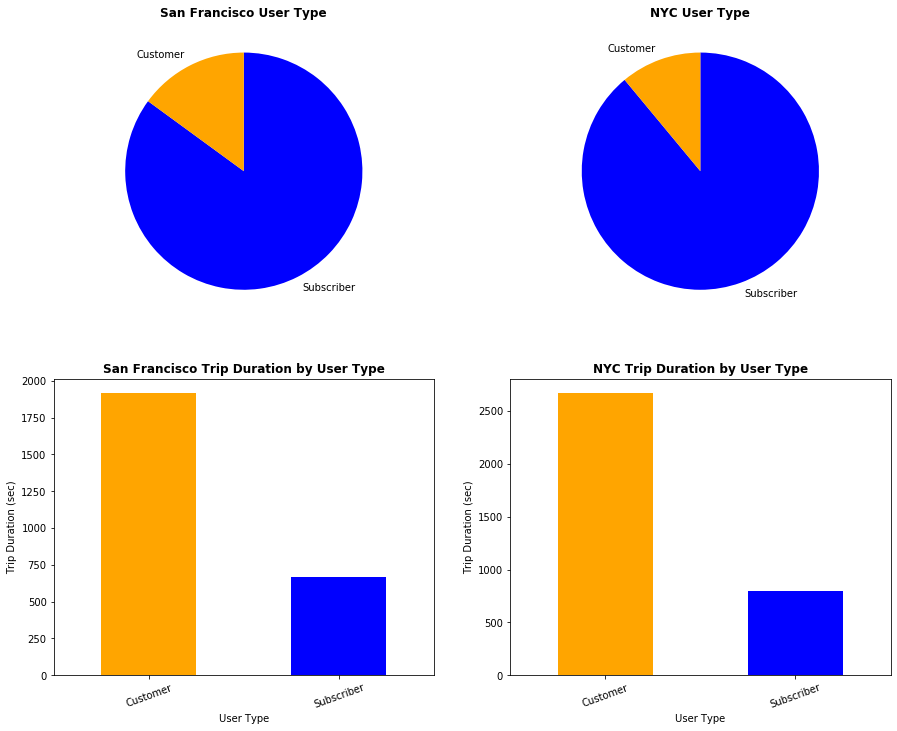

In [83]:
# average ride duration broken into user types
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
sorted_counts = df_sf['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle=90,
       counterclock=False, colors = ['b', 'orange'])
plt.title('San Francisco User Type', fontweight = 'semibold')

plt.subplot(2,2,3)
user.plot(kind='bar', color=['orange','b'])
plt.ylabel('Trip Duration (sec)')
plt.xlabel('User Type')
plt.xticks(rotation = 20)
plt.title("San Francisco Trip Duration by User Type", fontweight = 'semibold')

plt.subplot(2,2,2)
sorted_counts = df_nyc['usertype'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle=90,
       counterclock=False, colors = ['b', 'orange'])
plt.title('NYC User Type', fontweight = 'semibold')

plt.subplot(2,2,4)
user_nyc.plot(kind='bar', color=['orange','blue'])
plt.ylabel('Trip Duration (sec)')
plt.xlabel('User Type')
plt.xticks(rotation = 20)
plt.title("NYC Trip Duration by User Type", fontweight = 'semibold')

## Monthly Variation in Ride Durations

When comparing the average monthly ride durations between San Francisco and New York City, it becomes clear that there is **much greater seasonal variation for ride lengths in New York**.

There is a slight dip in ride durations in November/December in San Francisco. 

However New York has both a pronounced **peak in May & June** as well as as **large drop off in winter**: (November, December, January, February)

This can be explained by the fact that **New York has much greater seasonal weather variation than San Francisco**.

In [84]:
month_sf = df_sf.groupby('month')['duration_sec'].mean()
month_nyc = df_nyc.groupby('month')['tripduration'].mean()

In [86]:
df_sf.head(2)

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,month,start_time_month_name,start_time_weekday,start_time_hour
0,0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,1,January,Wed,22
1,1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,1,January,Wed,16


Text(0.5, 1.0, 'New York City Monthly Ride Duration')

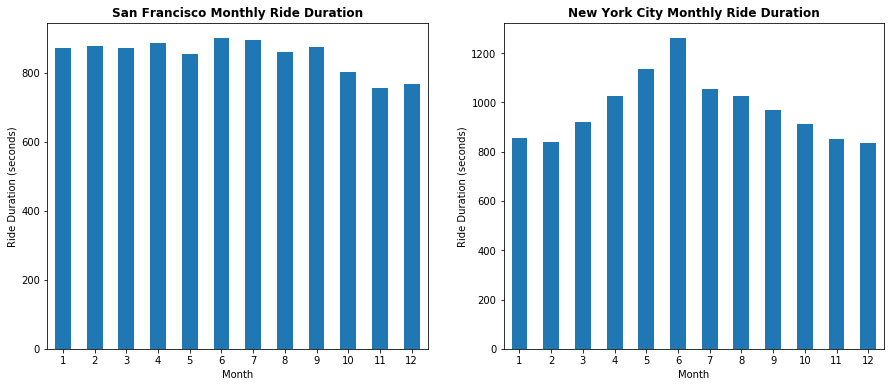

In [88]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
month_sf.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Ride Duration (seconds)')
plt.xticks(rotation = 0)
plt.title('San Francisco Monthly Ride Duration', fontweight = 'semibold')

plt.subplot(1,2,2)
month_nyc.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Ride Duration (seconds)')
plt.xticks(rotation = 0)
plt.title('New York City Monthly Ride Duration', fontweight = 'semibold')

## Ride Usage with Respect to Time of Day, Day of the Week, User Type & City

Next we take a look at the differences in **hourly usage rates** for the bike sharing systems in San Francisco and New York.

We can see that there is a clear difference between subscribers and customers in both cities with respect to how and when they use the system.

Subscribers use the bikes almost exclusively **Monday through Friday** with significant peaks around **8am and 5pm**. This clearly shows that subscribers are using the service for their **work commutes**.

Customers, on the other hand, very rarely use the bike system Monday through Friday. They use the bikes on **the weekends** and during the **window of 10am to 5pm** with a peak at roughly 2pm. 

This clearly shows the vast majority of 'customers' in both New York and San Francisco are not using these bikes for a work commute and are **likely to be tourists**. This backs up the earlier finding that customers spend on average almost triple the time on the bikes. They are in **no rush to get to work** and are simply sightseeing and enjoying the respective cities.

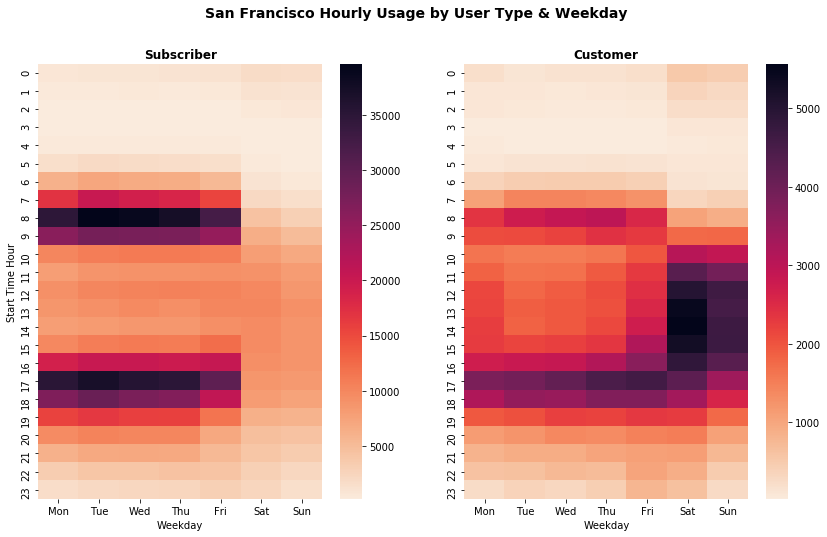

In [92]:
# Setting the weekday order
df_sf['start_time_weekday'] = pd.Categorical(df_sf['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(14,8))
plt.suptitle('San Francisco Hourly Usage by User Type & Weekday', fontsize=14, fontweight='bold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df_sf.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_customer, cmap="rocket_r")

plt.title("Subscriber", fontweight='semibold')
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_sf.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_subscriber, cmap="rocket_r")

plt.title("Customer", fontweight='semibold')
plt.xlabel('Weekday')
plt.ylabel('');

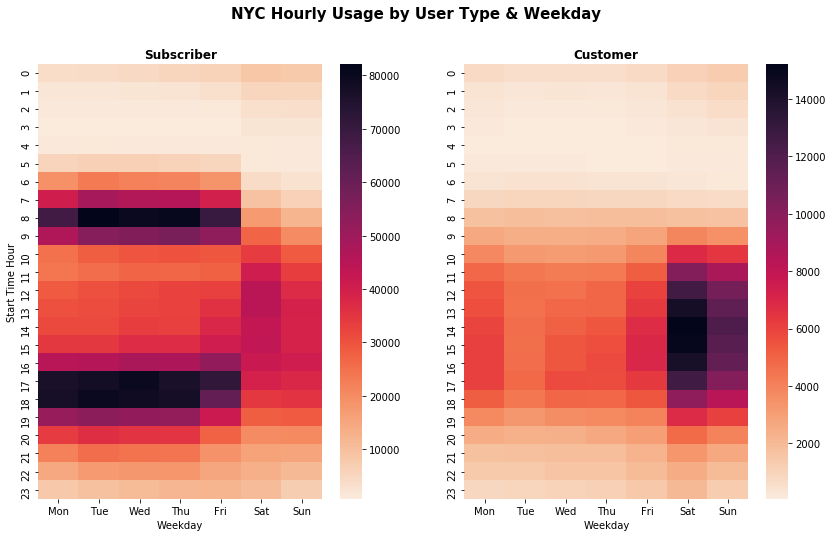

In [93]:
# Setting the weekday order
df_nyc['start_time_weekday'] = pd.Categorical(df_nyc['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(14,8))
plt.suptitle('NYC Hourly Usage by User Type & Weekday', fontsize=15, fontweight='bold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df_nyc.query('usertype == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bikeid"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bikeid")
sb.heatmap(df_customer, cmap="rocket_r")

plt.title("Subscriber", fontweight='semibold')
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_nyc.query('usertype == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bikeid"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bikeid")
sb.heatmap(df_subscriber, cmap="rocket_r")

plt.title("Customer", fontweight='semibold')
plt.xlabel('Weekday')
plt.ylabel('');

### NYC working hours are slightly longer than San Francisco

New York and San Francisco subscribers appear to have **identical work starting times** centered around 8am.

However the finishing times tell a different story. San Franciscans leave work around 5pm, whereas in New York City subscribers are leaving on average **30 minutes later** with a greater proportion of times after 6pm.

Text(531.1090909090908, 0.5, 'Start Time Hour')

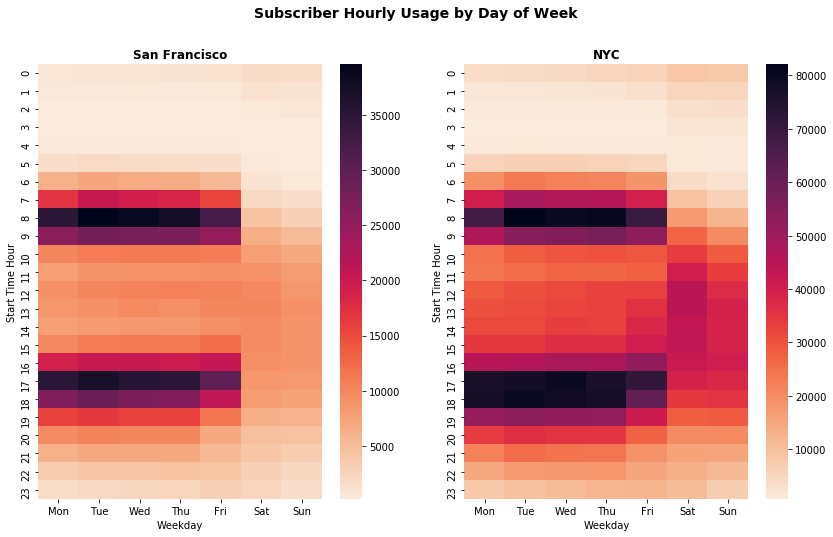

In [94]:
# Setting the weekday order
df_sf['start_time_weekday'] = pd.Categorical(df_sf['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)

df_nyc['start_time_weekday'] = pd.Categorical(df_nyc['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(14,8))
plt.suptitle('Subscriber Hourly Usage by Day of Week', fontsize=14, fontweight='bold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df_sf.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_customer, cmap="rocket_r")

plt.title("San Francisco", fontweight='semibold')
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for customers
plt.subplot(1, 2, 2)
df_customer = df_nyc.query('usertype == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bikeid"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bikeid")
sb.heatmap(df_customer, cmap="rocket_r")

plt.title("NYC", fontweight='semibold')
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')